# Regression Analysis for Employee satisfaction


Building on the steps completed in the EDA lab for this same project, we will be building a model for the HR team that wants to predict wether an employee leaves the company, and also know the factors leading to employees leaving the organization.


### Import packages

In [60]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For data modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [3]:
# Load dataset into a dataframe
df0 = pd.read_csv(r'C:\Users\user\Desktop\Course 7\HR_capstone_dataset.csv')

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# Display basic information
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
# Display basic stats
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department',
                         'number_project': 'project_number'})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'project_number',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [9]:
# Check missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
project_number           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [10]:
# Check for duplicates
duplicate=df0.duplicated().sum()

In [11]:
duplicate

3008

In [12]:
# make a copy of the original data
df1= df0.copy()

# Drop duplicates and save resulting dataframe in a new variable as needed
df1= df1.drop_duplicates(keep= 'first')

# Print the number of rows and coumns
print(df1.shape)

# Display first few rows
(df1.head(5))

(11991, 10)


,satisfaction_level,last_evaluation,project_number,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model 
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
### Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables 
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size 

## Note

The steps that will be completed during the model building involves:


- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model


### Identify the type of prediction task.

The goal is to predict whether an employee leaves the company, which is a categorical outcome variable. So this task involves classification. More specifically, this involves binary classification, since the outcome variable `left` can be either 1 (indicating employee left) or 0 (indicating employee didn't leave). 


### Identify the types of models most appropriate for this task.

Since the variable we want to predict (whether an employee leaves the company) is categorical, we could either build a Logistic Regression model, or a Tree-based Machine Learning model.


### Logistic Regression Model

This approach covers implementation of Logistic Regression.

**Note** that binomial logistic regression suits the task because it involves binary classification.

Before splitting the data, encode the non-numeric variables. There are two: `department` and `salary`. 

`department` is a categorical variable, which means we can dummy it for modeling. 

`salary` is categorical too, but it's ordinal. There's a hierarchy to the categories, so it's better not to dummy this column, but rather to convert the levels to numbers, 0&ndash;2.

In [20]:
# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
print(df_enc.shape)
df_enc.head()

(11991, 19)


,satisfaction_level,last_evaluation,project_number,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


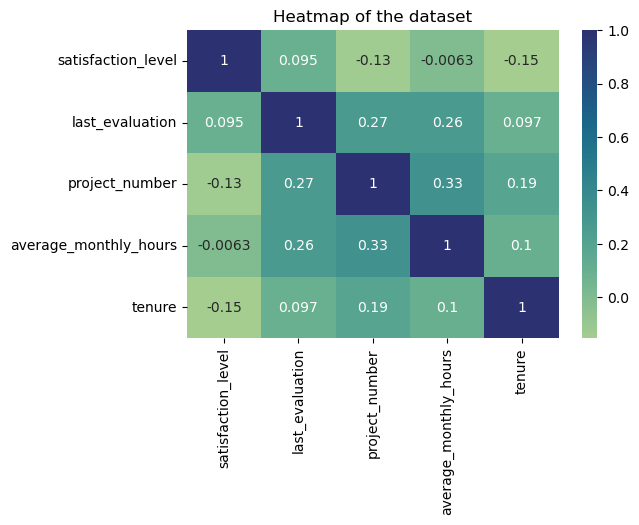

In [23]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(6, 4))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'project_number', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

**Note:**
Since logistic regression is quite sensitive to outliers, it would be a good idea at this stage to remove the outliers in the `tenure` column that were identified earlier.

In [25]:
# Determine the number of rows containing outliers 

# Compute the 25th percentile value in `tenure`
percentile25= df1['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75= df1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr= percentile75- percentile25

upper_limit= percentile75 + 1.5*iqr
lower_limit= percentile25 - 1.5*iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure']> upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


In [29]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

print(df_logreg.shape)
# Display first few rows of new dataframe
df_logreg.head()

(11167, 19)


,satisfaction_level,last_evaluation,project_number,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Isolate the outcome variable, which is the variable we want the model to predict. `[left]`

In [31]:
# Isolate the outcome variable
y= df_logreg['left']

In [36]:
# Isolate the predictor variables which are all other columns except ['left']
X= df_logreg.drop(['left'], axis=1 )

print(X.shape)
df_logreg.head()

(11167, 18)


,satisfaction_level,last_evaluation,project_number,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [37]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state= 0, test_size= 0.25, stratify=y)

In [39]:
# Construct a logistic regression model and fit it to the training dataset
log_clf= LogisticRegression(random_state=0, max_iter= 500).fit(X_train, y_train)

Test the logistic regression model: use the model to make predictions on the test set.

In [43]:
y_pred= log_clf.predict(X_test)

Create a confusion matrix to visualize the results of the logistic regression model. 

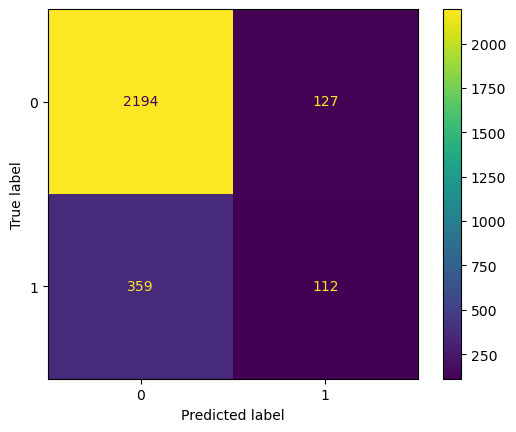

In [53]:
# Compute values for confusion matrix
log_cm= confusion_matrix(y_test, y_pred, labels= log_clf.classes_)

# Create display of confusion matrix
log_disp= ConfusionMatrixDisplay(confusion_matrix= log_cm,
                                display_labels= log_clf.classes_)

# Plot the confusion matrix
log_disp.plot()

# Dislay plot
plt.show()

## Note: 
The upper-left quadrant displays the number of true negatives.
The upper-right quadrant displays the number of false positives.
The bottom-left quadrant displays the number of false negatives.
The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

In [55]:
df_enc['left'].value_counts(normalize= True)*100

0    83.39588
1    16.60412
Name: left, dtype: float64

In [58]:
df_logreg['left'].value_counts(normalize=True)*100

0    83.146772
1    16.853228
Name: left, dtype: float64

There is an approximately 83%-17% split. So the data is not perfectly balanced, but it is not too imbalanced. If it was more severely imbalanced, we might want to resample the data to make it more balanced. In this case, we will use this data without modifying the class balance and continue evaluating the model.

In [61]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.95      0.90      2321
    Predicted would leave       0.47      0.24      0.32       471

                 accuracy                           0.83      2792
                macro avg       0.66      0.59      0.61      2792
             weighted avg       0.79      0.83      0.80      2792



## Conclusion

The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.